In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm
import seaborn as sns
from tqdm import tqdm
from matplotlib import rc
import chardet
from sklearn.impute import SimpleImputer

# 파일의 인코딩 확인
with open('경주시_기상데이터_품질정보_2022.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result)
# 한글 폰트 설정
rc('font', family='Malgun Gothic')  # 윈도우 사용 시


{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


In [75]:
# 태양광 발전량 파일 불러오기
y24 = dict()
for i in range(1,10):
    file_path = f'한국남동발전_경상대_시간대발전22~24/한국남동발전_시간대별_태양광_발전실적_경상대_240{i}.xls'
    y24[i] = pd.read_excel(file_path)

for i in range(10,13):
    file_path = f'한국남동발전_경상대_시간대발전22~24/한국남동발전_시간대별_태양광_발전실적_경상대_24{i}.xls'
    y24[i] = pd.read_excel(file_path)


# 엑셀 파일 읽기
y23 = dict()
for i in range(1,10):
    file_path = f'한국남동발전_경상대_시간대발전22~24/한국남동발전_시간대별_태양광_발전실적_경상대_230{i}.xls'
    y23[i] = pd.read_excel(file_path)

for i in range(10,13):
    file_path = f'한국남동발전_경상대_시간대발전22~24/한국남동발전_시간대별_태양광_발전실적_경상대_23{i}.xls'
    y23[i] = pd.read_excel(file_path)


# 엑셀 파일 읽기
y22 = dict()
for i in range(1,10):
    file_path = f'한국남동발전_경상대_시간대발전22~24/한국남동발전_시간대별_태양광_발전실적_경상대_220{i}.xls'
    y22[i] = pd.read_excel(file_path)

for i in range(10,13):
    file_path = f'한국남동발전_경상대_시간대발전22~24/한국남동발전_시간대별_태양광_발전실적_경상대_22{i}.xls'
    y22[i] = pd.read_excel(file_path)


for i in range(1,13):
    y24[i] = y24[i][y24[i]['발전구분'] == '경상대태양광']

for i in range(1,13):
    y23[i] = y23[i][y23[i]['발전구분'] == '경상대태양광']


for i in range(1,13):
    y22[i] = y22[i][y22[i]['발전구분'] == '경상대태양광']

In [21]:
y24[1]

,발전구분,호기,일자,1시 발전량(MWh),2시 발전량(MWh),3시 발전량(MWh),4시 발전량(MWh),5시 발전량(MWh),6시 발전량(MWh),7시 발전량(MWh),...,21시 발전량(MWh),22시 발전량(MWh),23시 발전량(MWh),24시 발전량(MWh),총량(MW),평균(MW),최대(시간별),최소(시간별),최대,최소
1,경상대태양광,1,2024-01-31 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0.0,2324.808,97,488.44,14.112,488.448,0
3,경상대태양광,1,2024-01-30 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0.0,2818.080,117,515.16,0.144,515.160,0
5,경상대태양광,1,2024-01-29 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0.0,3320.352,138,526.89,1.152,526.896,0
7,경상대태양광,1,2024-01-28 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0.0,3319.560,138,533.37,0.936,533.376,0
9,경상대태양광,1,2024-01-27 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0.0,3234.960,135,515.44,0.936,515.448,0
11,경상대태양광,1,2024-01-26 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0.0,3297.168,137,526.60,0.720,526.608,0
13,경상대태양광,1,2024-01-25 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0.0,2684.376,112,407.66,0.432,407.664,0
15,경상대태양광,1,2024-01-24 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0.0,3597.120,150,560.16,1.944,560.160,0
17,경상대태양광,1,2024-01-23 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0.0,3335.472,139,551.44,0.576,551.448,0
19,경상대태양광,1,2024-01-22 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0.0,3168.432,132,546.55,17.208,546.552,0


In [76]:
data = pd.read_csv('경상대_일자별관측.csv')

In [77]:
data['YYMMDDHHMI'] = data['YYMMDDHHMI'].astype(str)
data['YEAR'] = data['YYMMDDHHMI'].str[:4].astype(int)
data['MONTH'] = data['YYMMDDHHMI'].str[4:6].astype(int)
data['DAY'] = data['YYMMDDHHMI'].str[6:8].astype(int)
data['HOUR'] = data['YYMMDDHHMI'].str[8:].astype(int)
data['YYMMDDHHMI'] = data['YYMMDDHHMI'].astype(dtype='int64')



# 죄다 결측치인 컬럼제거: min, max 값이 동일한 컬럼
numeric_cols = data.select_dtypes(include=['number']).columns
cols_to_drop = [col for col in numeric_cols if (data[col].min() == data[col].max())]
data = data.drop(columns=cols_to_drop)

# object 타입 필요없는 컬럼 제거
data = data.drop(columns=['WW','CT'])

# 돌풍향이 그래서 뭔데
data = data.drop(columns=['GST','GST.1','GST.2'])

# 기압 변화 경향은 상관관계 분석이므로 추후 분석하는게 맞을듯함, 컬럼 차원수와 변수 복잡성을 줄이기 위해 제거
data = data.drop(columns=['PT','PR'])

# 유/무인 여부와 기상 코드는 추후 상관관계 분석에서 쓰는게 좋을 것으로 보임
data = data.drop(columns=['IR','IX'])

#년월일 따로 뺏으니 컬럼삭제
data = data.drop(columns=['YYMMDDHHMI'])

#SI는 일사량인데, 보니까 해가 없을때 -9로 나옴, 그래서 -9의 경우 0으로 전처리해도 상관없을듯함
data['SI'] = data['SI'].replace(-9, 0)
#SS 일조량도 마찬가지
'''
체크하는 코드, 보면 여름, 겨울 딱 해지는 시간쯤에만 -9로 되어있음
filtered_df = data[data['SS'] == -9]
result = filtered_df.groupby('MONTH')['HOUR'].unique()
result
'''
data['SS'] = data['SS'].replace(-9, 0)
#RN, RN.1 RN.2 도 강수량인데 마찬가지
data['RN'] = data['RN'].replace(-9, 0)
data['RN.1'] = data['RN.1'].replace(-9, 0)
data['RN.2'] = data['RN.2'].replace(-9, 0)




#CA, CA.1 CH, 데이터 결측치 처리 필요, 구간이 좀 커서 interpolation 기법이나 다른 상관관계 데이터 가져와서 RNN, 결정트리, CNN등을 이용해서 보간

#WS,WD,PS,PA,TA,TD,PV,HM   결측치 적은편, Brits,GRUI같은거로 보간해보기 얘는 SMA같은 기법으로 전처리 필요성있을듯, 각 구간별로 데이터 변동치가 너무큶

#TS는 min, max 값 범위 차이가 있어서 크기를 전처리해줘야할듯
#VS는 대기의 혼탁정도, 크기를 전처리해줘야 할듯한데 이게 표시해보니 좀 이상해서 사용은 일단 보류


In [113]:
data['CH'].describe()

count    26255.000000
mean         9.463036
std         22.712680
min         -9.000000
25%         -9.000000
50%          3.000000
75%         16.000000
max         76.000000
Name: CH, dtype: float64

<Axes: >

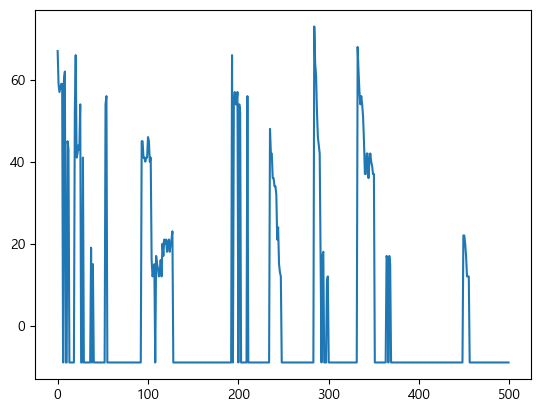

In [129]:
data['CH'][:500].plot()

In [55]:
data.columns



Index(['WD', 'WS', 'PA', 'PS', 'TA', 'TD', 'HM', 'PV', 'RN', 'RN.1', 'RN.2',
       'CA', 'CA.1', 'CH', 'VS', 'SS', 'SI', 'TS', 'YEAR', 'MONTH', 'DAY',
       'HOUR'],
      dtype='object')

In [ ]:
#  1. TM     : 관측시각 (KST)
#  2. STN    : 국내 지점번호
#  3. WD     : 풍향 (16방위)
#  4. WS     : 풍속 (m/s)
#  5. GST_WD : 돌풍향 (16방위)
#  6. GST_WS : 돌풍속 (m/s)
#  7. GST_TM : 돌풍속이 관측된 시각 (시분)
#  8. PA     : 현지기압 (hPa)
#  9. PS     : 해면기압 (hPa)
# 10. PT     : 기압변화경향 (Code 0200) 
# 11. PR     : 기압변화량 (hPa)
# 12. TA     : 기온 (C)
# 13. TD     : 이슬점온도 (C)
# 14. HM     : 상대습도 (%)
# 15. PV     : 수증기압 (hPa)

<Axes: >

C:\Users\juh08\anaconda3\envs\turbin\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\juh08\anaconda3\envs\turbin\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


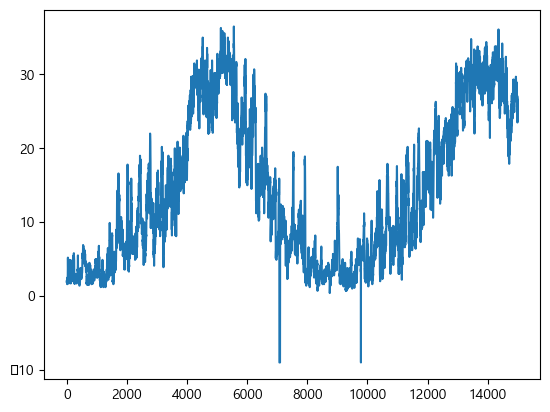

In [85]:
data['PV'][:15000].plot()

<Axes: >

C:\Users\juh08\anaconda3\envs\turbin\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\juh08\anaconda3\envs\turbin\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


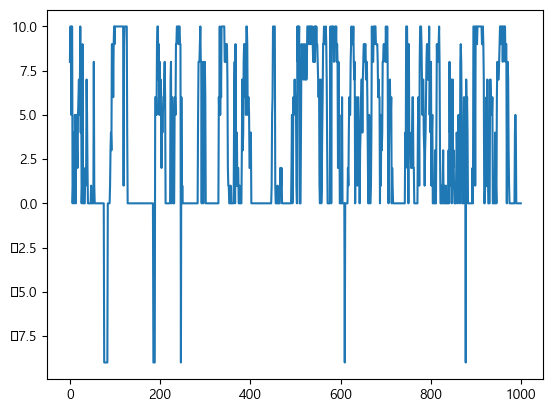

In [66]:
data['CA'][:1000].plot()

<Axes: >

C:\Users\juh08\anaconda3\envs\turbin\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\juh08\anaconda3\envs\turbin\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


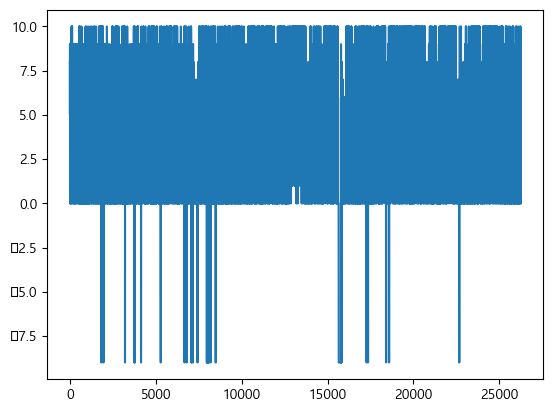

In [62]:
data['CA.1'].plot()

<Axes: >

C:\Users\juh08\anaconda3\envs\turbin\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\juh08\anaconda3\envs\turbin\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


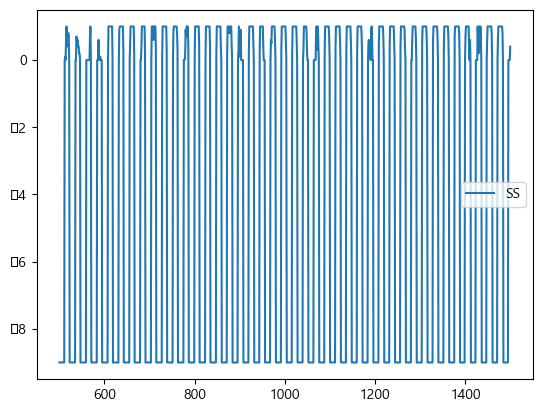

In [30]:
data[['SS']][500:1500].plot()

In [7]:
#--------------------------------------------------------------------------------------------------
#  1. TM     : 관측시각 (KST)
#  2. STN    : 국내 지점번호
#  3. WD     : 풍향 (16방위)
#  4. WS     : 풍속 (m/s)
#  5. GST_WD : 돌풍향 (16방위)
#  6. GST_WS : 돌풍속 (m/s)
#  7. GST_TM : 돌풍속이 관측된 시각 (시분)
#  8. PA     : 현지기압 (hPa)
#  9. PS     : 해면기압 (hPa)
# 10. PT     : 기압변화경향 (Code 0200) 
# 11. PR     : 기압변화량 (hPa)
# 12. TA     : 기온 (C)
# 13. TD     : 이슬점온도 (C)
# 14. HM     : 상대습도 (%)
# 15. PV     : 수증기압 (hPa)
# 16. RN     : 강수량 (mm) : 여름철에는 1시간강수량, 겨울철에는 3시간강수량
# 17. RN_DAY : 일강수량 (mm) : 해당시간까지 관측된 양(통계표)
# 18. RN_JUN : 일강수량 (mm) : 해당시간까지 관측된 양을 전문으로 입력한 값(전문)
# 19. RN_INT : 강수강도 (mm/h) : 관측하는 곳이 별로 없음
# 20. SD_HR3 : 3시간 신적설 (cm) : 3시간 동안 내린 신적설의 높이
# 21. SD_DAY : 일 신적설 (cm) : 00시00분부터 위 관측시간까지 내린 신적설의 높이
# 22. SD_TOT : 적설 (cm) : 치우지 않고 그냥 계속 쌓이도록 놔눈 경우의 적설의 높이
# 23. WC     : GTS 현재일기 (Code 4677)
# 24. WP     : GTS 과거일기 (Code 4561) .. 3(황사),4(안개),5(가랑비),6(비),7(눈),8(소나기),9(뇌전)
# 25. WW     : 국내식 일기코드 (문자열 22개) : 2자리씩 11개까지 기록 가능 (코드는 기상자원과 문의)
# 26. CA_TOT : 전운량 (1/10)
# 27. CA_MID : 중하층운량 (1/10)
# 28. CH_MIN : 최저운고 (100m)
# 29. CT     : 운형 (문자열 8개) : 2자리 코드로 4개까지 기록 가능
# 30. CT_TOP : GTS 상층운형 (Code 0509)
# 31. CT_MID : GTS 중층운형 (Code 0515)
# 32. CT_LOW : GTS 하층운형 (Code 0513)
# 33. VS     : 시정 (10m)
# 34. SS     : 일조 (hr)
# 35. SI     : 일사 (MJ/m2)
# 36. ST_GD  : 지면상태 코드 (코드는 기상자원과 문의)
# 37. TS     : 지면온도 (C)
# 38. TE_005 : 5cm 지중온도 (C)
# 39. TE_01  : 10cm 지중온도 (C)
# 40. TE_02  : 20cm 지중온도 (C)
# 41. TE_03  : 30cm 지중온도 (C)
# 42. ST_SEA : 해면상태 코드 (코드는 기상자원과 문의)
# 43. WH     : 파고 (m) : 해안관측소에서 목측한 값
# 44. BF     : Beaufart 최대풍력(GTS코드)
# 45. IR     : 강수자료 유무 (Code 1819) .. 1(Sec1에 포함), 2(Sec3에 포함), 3(무강수), 4(결측)
# 46. IX     : 유인관측/무인관측 및 일기 포함여부 (code 1860) .. 1,2,3(유인) 4,5,6(무인) / 1,4(포함), 2,5(생략), 3,6(결측)
#--------------------------------------------------------------------------------------------------
# YYMMDDHHMI STN  WD   WS GST  GST  GST     PA     PS PT    PR    TA    TD    HM    PV     RN     RN     RN     RN     SD     SD     SD WC WP WW                      CA  CA   CH CT        CT  CT  CT    VS   SS    SI ST    TS    TE    TE    TE    TE  ST   WH BF IR IX
#        KST  ID  16  m/s  WD   WS   TM    hPa    hPa  -   hPa     C     C     %   hPa     mm    DAY    JUN    INT    HR3    DAY    TOT -- -- ---------------------- TOT MID  MIN -------- TOP MID LOW                  GD     C     5    10    20    30 SEA    m --  -  -

<Axes: ylabel='Frequency'>

C:\Users\juh08\anaconda3\envs\turbin\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\juh08\anaconda3\envs\turbin\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


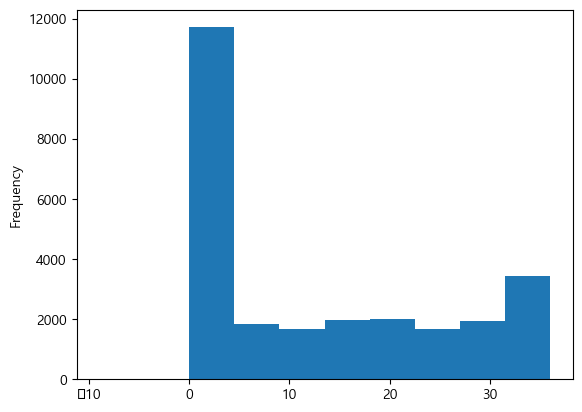

In [21]:
data['WD'] = data['WD'].replace(-9, np.nan)
